## Assignment 8 - Text Mining: Word Association
**GROUP: Forhad Akbar, Adam Douglas, and Soumya Ghosh**

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk as nltk
import string
import pandas as pd

## Description of the database 

For this project we chose Lewis Carroll's _Alice in Wonderland_. First we will load the corpus from _Project Gutenberg_ which is included in the NLTK module.

In [4]:
nltk.download('gutenberg')
carroll = nltk.corpus.gutenberg.words('carroll-alice.txt')
carroll[0:20]

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/soumya.ghosh/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'Hole']

We can see above that the text is already tokenized, but it seems like there are artifacts from the Gutenberg Project remaining. We'll remove punctuation and change all the words to lower case.

There also appear to be single letters represented as tokens, this is likely because of the apostrophes in possessive nouns (e.g. "Alice's" becomes "Alice" and "'")

## Number of unique tokens

Next we look at the number of unique tokens in the corpus. We know from the above exploration that a little cleaning is needed.

In [5]:
tokens = [token.strip(string.punctuation).lower() for token in carroll]
tokens = [token for token in tokens if token not in ['', 's', 't']]

tokens[0:10]

['alice',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 '1865',
 'chapter',
 'i']

Our tokens look much better now that we've removed punctuation and orphaned single letters.

Now we'll see how many unique tokens we have:

In [6]:
token_uniq = set(tokens)
len(token_uniq)

2568

We have 2,568 unique tokens in the corpus.

In [7]:
len(tokens)

26917

We have 26,917 total occurrences of the tokens in the corpus.

## How many unique words make up half of the corpus?

To answer this we have to first count the frequency of each token. This is pretty easy with Python's built-in `Counter` object:

In [8]:
count_token = Counter(tokens)
count_token

Counter({'alice': 398,
         'adventures': 7,
         'in': 369,
         'wonderland': 3,
         'by': 59,
         'lewis': 1,
         'carroll': 1,
         '1865': 1,
         'chapter': 12,
         'i': 545,
         'down': 102,
         'the': 1642,
         'rabbit': 51,
         'hole': 5,
         'was': 357,
         'beginning': 14,
         'to': 729,
         'get': 46,
         'very': 144,
         'tired': 7,
         'of': 514,
         'sitting': 10,
         'her': 248,
         'sister': 9,
         'on': 193,
         'bank': 3,
         'and': 872,
         'having': 10,
         'nothing': 34,
         'do': 81,
         'once': 34,
         'or': 77,
         'twice': 5,
         'she': 553,
         'had': 178,
         'peeped': 3,
         'into': 67,
         'book': 11,
         'reading': 3,
         'but': 170,
         'it': 595,
         'no': 90,
         'pictures': 4,
         'conversations': 1,
         'what': 141,
         'is': 108,
   

For the full list, we'll convert the `Counter` output into a Pandas dataframe:

In [11]:
data = zip(count_token.keys(), count_token.values())
df = pd.DataFrame(data, columns = ['word', 'n']) \
       .sort_values(by='n', ascending=False) \
       .reset_index()
df.head(20)

,index,word,n
0,11,the,1642
1,26,and,872
2,16,to,729
3,47,a,632
4,40,it,595
5,33,she,553
6,9,i,545
7,20,of,514
8,232,said,462
9,242,you,411


We know from above there are 26,917 total occurrences of the tokens. So we'll set a cumulative sum on the dataframe and find the closest point to 26,917 / 2 = 13,458:

In [12]:
df['cumsum'] = df.n.cumsum()
df.query('cumsum >= 13400 and cumsum <= 13500')

,index,word,n,cumsum
53,78,when,79,13459


By the index, we see that the 53 most frequent tokens make up slightly more than half of the total corpus length.

## Top 200 most frequent tokens

Now we will grab the 200 most frequently-occurring tokens. This is easy to get from the dataframe:

In [13]:
df.word.head(200).tolist()

['the',
 'and',
 'to',
 'a',
 'it',
 'she',
 'i',
 'of',
 'said',
 'you',
 'alice',
 'in',
 'was',
 'that',
 'as',
 'her',
 'at',
 'on',
 'all',
 'with',
 'had',
 'but',
 'for',
 'they',
 'so',
 'be',
 'not',
 'very',
 'what',
 'this',
 'little',
 'he',
 'out',
 'is',
 'one',
 'down',
 'up',
 'there',
 'if',
 'his',
 'about',
 'then',
 'no',
 'them',
 'know',
 'were',
 'like',
 'would',
 'again',
 'went',
 'herself',
 'do',
 'have',
 'when',
 'or',
 'could',
 'queen',
 'thought',
 'off',
 'time',
 'how',
 'me',
 'see',
 'into',
 'king',
 'm',
 'did',
 'well',
 'who',
 'can',
 'your',
 'don',
 'now',
 'turtle',
 'by',
 'began',
 'my',
 'its',
 'll',
 'an',
 'mock',
 'way',
 'hatter',
 'quite',
 'gryphon',
 'are',
 'think',
 'their',
 'just',
 'much',
 'here',
 'rabbit',
 'some',
 'first',
 'say',
 'only',
 'go',
 'head',
 'more',
 'thing',
 'which',
 'never',
 'voice',
 'get',
 'come',
 'looked',
 'got',
 'oh',
 'must',
 've',
 'mouse',
 'after',
 'him',
 'duchess',
 'such',
 'round',
 

## Plot of top 200 words' frequencies

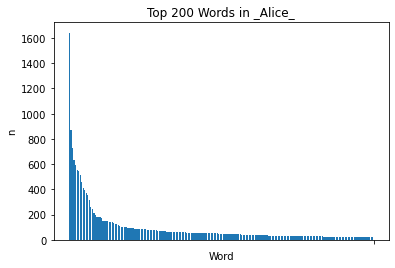

In [14]:
plt.bar(df.word.head(200).tolist(),
        df.n.head(200).tolist())
plt.xlabel('Word')
plt.ylabel('n')
plt.title('Top 200 Words in _Alice_')

plt.xticks('', '')

plt.show()

With a casual glance at the above plot, the observed frequency of tokens in the corpus does appear to approximate Zipf's law pretty closely.

## Difference of _Alice_ corpus from all corpus of all words

We can see from above that five most frequent word in Alice corpus are "the", "and", "to", "a" and "it". These words might have similar ranking for all English documents.
The sixth frequent word in Alice corpus is "she" which reflect that the main charater of the story is a female. The word "she" might not be so frequent in other English text. Also, the word "alice" is the 10th frequent word.  
We can also see that "King" and "Queen" are frequent while all other English text might be different in this aspect.

# Video Presentation
Link:https://youtu.be/07a2dTuc-ww

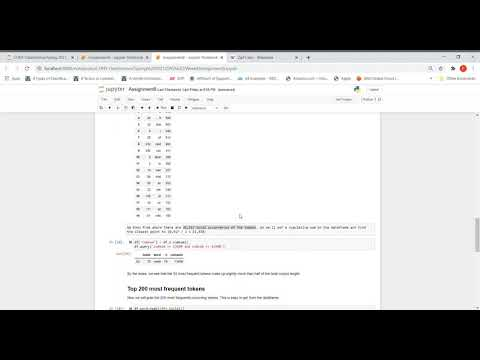

In [15]:
from IPython.display import YouTubeVideo

YouTubeVideo('07a2dTuc-ww', width=800, height=600)